In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
import numpy as np

# AnaK-1

In [2]:
#load data
x = np.load('example1_CovMatrix/AnaK1_x_axis_distances.npy')
y = np.load('example1_CovMatrix/AnaK1_y_axis_velocities.npy')
unc = np.load('example1_CovMatrix/AnaK1_y_uncertainities.npy')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          r_cen       alpha  beta       sigma        omega       v_offset     
    ----------------- ----- ----- ------------------ ----- -------------------
    7.990890807087159 1e-05 1e-05 106.66252460508608   1.0 -14.691345894994585


(-200, 200)

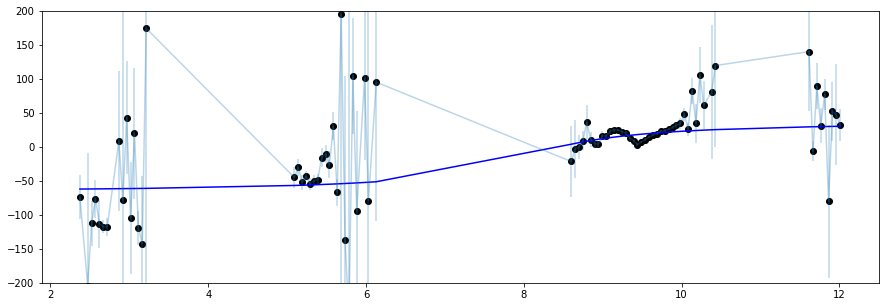

In [3]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel(r, r_cen=0, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
    dr = r - r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi + v_offset)
m_init = eriksmodel(bounds={'r_cen': (4,10), 'alpha':(.01,.00001), 'beta':(.01,.00001),'sigma': (0,170),'omega':(0,1)})
m_init.r_cen=7.1

###fit model
fit = LevMarLSQFitter()
m = fit(m_init, x, y, weights=(1/(unc)**2))
print(m)

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x, y, color='k')
plt.errorbar(x,y,yerr=unc,alpha=.3)
plt.plot(x, m(x), color='b')
plt.ylim(-200,200) 

In [4]:
#look for 'param_cov': None
fit.fit_info['param_cov']

{'cov_x': None,
 'fjac': array([[ 1.05158192e+01,  2.68866566e-06,  9.73054610e-05,
          1.31752308e-04,  8.47422816e-05,  1.20214117e-03,
          5.83503384e-04,  1.12648910e-05,  4.68174761e-07,
          1.79021064e-05,  1.85203702e-05,  1.37838587e-05,
          2.07866313e-04,  1.33469775e-05,  3.81617316e-07,
          1.57839194e-03,  2.22465123e-03,  2.83762754e-03,
          8.25271803e-03,  5.70219672e-03,  5.07583975e-03,
          5.48068675e-03,  2.04687186e-03,  2.50465815e-03,
          1.20691975e-03,  1.09358807e-03,  1.25420520e-03,
          1.25942779e-06,  9.09133891e-06,  3.97531714e-07,
          7.85768305e-05,  2.69511697e-05,  4.37196510e-05,
          2.07528653e-06,  1.74038817e-05,  8.66105054e-04,
          1.23930280e-03,  7.08122883e-03,  1.01260796e-02,
          3.16968164e-03,  1.51797896e-02,  4.71890182e-02,
          9.42297734e-02,  3.20929099e-02,  1.09630009e-01,
          1.19041755e-01,  8.62203619e-02,  4.06971413e-01,
          1.2946

# Gilgamesh-1

In [5]:
#load data
x2 = np.load('example2_CovMatrix/Gilgamesh1_x_axis_distances.npy')
y2 = np.load('example2_CovMatrix/Gilgamesh1_y_axis_velocities.npy')
unc2 = np.load('example2_CovMatrix/Gilgamesh1_y_uncertainities.npy')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
    alpha beta       sigma               omega             v_offset    
    ----- ---- ------------------ ------------------- -----------------
    1e-07  1.0 -74.13208221589348 0.13314853521270434 14.88019288212847


/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


(-200, 200)

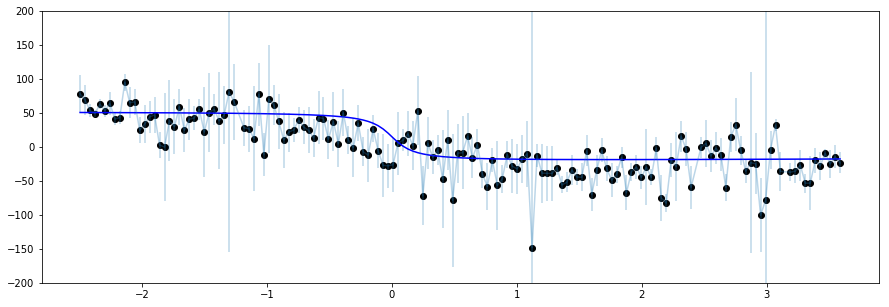

In [6]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
m_init2 = eriksmodel(bounds={'alpha':(.0000001,1), 'beta':(.0000001,1),'sigma': (-300,300),'omega':(0,100)})


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x2, y2, weights=(1/(unc2)**2))
print(m2)

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x2, y2, color='k')
plt.errorbar(x2, y2, yerr=unc2, alpha=.3)
plt.plot(x2, m2(x2), color='b')
plt.ylim(-200,200) 

In [7]:
#look for 'param_cov': None
fit.fit_info['param_cov']

{'cov_x': None,
 'fjac': array([[ 8.36586895e-01,  2.33197573e-02,  1.48809954e-01,
          3.85255042e-01,  2.01141839e-01,  1.54394516e-01,
          4.38825666e-02,  1.80429148e-01,  1.58007406e-01,
          8.29753712e-02,  2.65203540e-02,  3.86617701e-02,
          4.06757391e-02,  1.87737859e-02,  2.67210787e-02,
          2.13275628e-02,  4.06125899e-02,  2.50237278e-03,
          4.54525353e-03,  1.02687592e-02,  2.37319710e-02,
          1.60730377e-02,  1.96115956e-02,  6.10958621e-02,
          7.73485648e-02,  4.36005238e-03,  5.73235825e-03,
          3.73629574e-02,  4.01842375e-03,  1.18093256e-02,
          3.93602652e-04,  7.14551329e-03,  3.32813467e-02,
          2.18796843e-02,  4.34725716e-03,  1.23739662e-02,
          2.81806364e-02,  4.55710859e-03,  3.58566150e-02,
          1.90534484e-02,  1.90524611e-02,  4.01477374e-02,
          1.18559165e-01,  1.01880978e-01,  5.99551909e-02,
          3.56262063e-02,  5.66519054e-02,  2.96279816e-02,
          4.9428

# a random custom model example where param_cov works

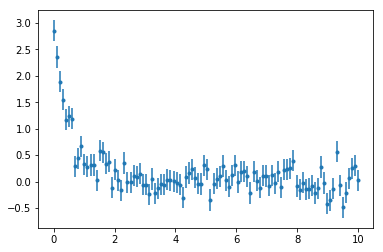

In [8]:
#generate fake data
x1 = np.linspace(0,10,100)
a = 3
b = -2
c = 0
y1 = a*np.exp(b*x1+c)
y1 += np.random.normal(0., 0.2, x1.shape)
y1_err = np.ones(x1.shape)*0.2

#plot fake data
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.show()

In [9]:
#def custom  model
@custom_model
def exponential(x, a=1., b=1., c=1.): #like eriksmodel
    return a*np.exp(b*x+c)

#fit model
exp_model = exponential(1.,-1.,1.) #like m_init
fitter = LevMarLSQFitter() #like fit
exp_fit = fitter(exp_model, x1, y1, weights = 1.0/y1_err**2) #like m

In [10]:
fitter.fit_info['param_cov']

{'cov_x': array([[-2.15572120e+12, -3.82014989e-01,  1.09951163e+12],
        [-3.82749261e-01,  8.72860345e-04,  1.95022367e-01],
        [ 1.09951163e+12,  1.94647857e-01, -5.60798780e+11]]),
 'fjac': array([[-1.24956883e+02, -2.81180592e+01, -6.37334484e+01,
          3.19151633e-01,  2.65140879e-01,  2.20270487e-01,
          1.82993613e-01,  1.52025189e-01,  1.26297621e-01,
          1.04923989e-01,  8.71674641e-02,  7.24159165e-02,
          6.01608067e-02,  4.99796570e-02,  4.15214863e-02,
          3.44947111e-02,  2.86570929e-02,  2.38073881e-02,
          1.97784098e-02,  1.64312647e-02,  1.36505645e-02,
          1.13404485e-02,  9.42127871e-03,  7.82689435e-03,
          6.50233127e-03,  5.40192701e-03,  4.48774665e-03,
          3.72827511e-03,  3.09733066e-03,  2.57316237e-03,
          2.13770027e-03,  1.77593240e-03,  1.47538734e-03,
          1.22570419e-03,  1.01827549e-03,  8.45950423e-04,
          7.02788315e-04,  5.83853855e-04,  4.85046943e-04,
          4.029613

In [11]:
#possibly diff data types?

print('Anak1:', type(x),type(y),type(unc))
print('Gilgamesh:',type(x2),type(y2),type(unc2))
print('random ex:',type(x1),type(y1),type(y1_err))
print('##############################')
print('Anak1:', len(x),len(y),len(unc))
print('Gilgamesh:',len(x2),len(y2),len(unc2))
print('random ex:',len(x1),len(y1),len(y1_err))
print('##############################')
print('Anak1:', x.dtype,y.dtype,unc.dtype)
print('Gilgamesh:', x2.dtype,y2.dtype,unc2.dtype)
print('random ex:', x1.dtype,y1.dtype,y1_err.dtype)

Anak1: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Gilgamesh: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
random ex: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
##############################
Anak1: 81 81 81
Gilgamesh: 151 151 151
random ex: 100 100 100
##############################
Anak1: float64 float64 float64
Gilgamesh: float64 float64 float64
random ex: float64 float64 float64


# Difference is the Use of Bounds

<eriksmodel(alpha=8.41848905, beta=25.33978572, sigma=-205.8701181, omega=0.91884645, v_offset=-2.69793063)>


(-200, 200)

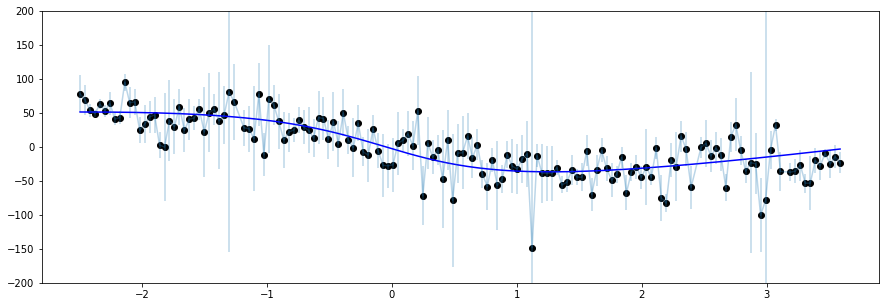

In [12]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
#####REMOVED BOUNDS HERE
m_init2 = eriksmodel(.00001,.00001,-120,0.5,0) #bounds={'alpha':(.0000001,1), 'beta':(.0000001,1),'sigma': (-300,300),'omega':(0,100)})


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x2, y2, weights=(1/(unc2)**2))
print(repr(m2))

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x2, y2, color='k')
plt.errorbar(x2, y2, yerr=unc2, alpha=.3)
plt.plot(x2, m2(x2), color='b')
plt.ylim(-200,200) 

In [13]:
fitter.fit_info['param_cov']

{'cov_x': array([[-2.15572120e+12, -3.82014989e-01,  1.09951163e+12],
        [-3.82749261e-01,  8.72860345e-04,  1.95022367e-01],
        [ 1.09951163e+12,  1.94647857e-01, -5.60798780e+11]]),
 'fjac': array([[-1.24956883e+02, -2.81180592e+01, -6.37334484e+01,
          3.19151633e-01,  2.65140879e-01,  2.20270487e-01,
          1.82993613e-01,  1.52025189e-01,  1.26297621e-01,
          1.04923989e-01,  8.71674641e-02,  7.24159165e-02,
          6.01608067e-02,  4.99796570e-02,  4.15214863e-02,
          3.44947111e-02,  2.86570929e-02,  2.38073881e-02,
          1.97784098e-02,  1.64312647e-02,  1.36505645e-02,
          1.13404485e-02,  9.42127871e-03,  7.82689435e-03,
          6.50233127e-03,  5.40192701e-03,  4.48774665e-03,
          3.72827511e-03,  3.09733066e-03,  2.57316237e-03,
          2.13770027e-03,  1.77593240e-03,  1.47538734e-03,
          1.22570419e-03,  1.01827549e-03,  8.45950423e-04,
          7.02788315e-04,  5.83853855e-04,  4.85046943e-04,
          4.029613